In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def filled_ellipse_dataset(r_x, r_y, tilt_angle, n, noise_level):
    # Initialize arrays for the rotated points
    x_rot = []
    y_rot = []

    for _ in range(n):
        # Generate a random angle
        angle = np.random.uniform(0, 2 * np.pi)
        # Generate a random radius to ensure points fill the ellipse
        radius = np.random.uniform(0, 1)
        r_x_rand = radius * r_x + np.random.normal(0, noise_level)
        r_y_rand = radius * r_y + np.random.normal(0, noise_level)

        # Calculate the point's position before rotation
        x = r_x_rand * np.cos(angle)
        y = r_y_rand * np.sin(angle)

        # Rotate the point by the specified tilt angle
        angle_rad = np.deg2rad(tilt_angle)
        x_rotated = x * np.cos(angle_rad) - y * np.sin(angle_rad)
        y_rotated = x * np.sin(angle_rad) + y * np.cos(angle_rad)

        x_rot.append(x_rotated)
        y_rot.append(y_rotated)

    return np.array(x_rot), np.array(y_rot)

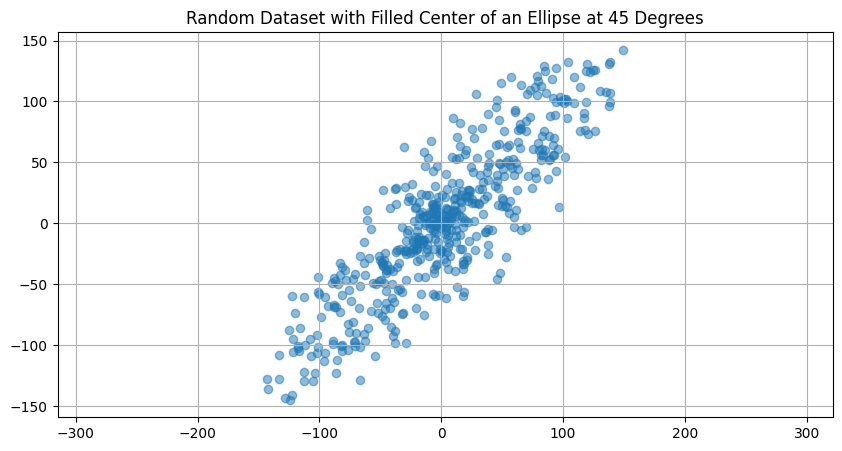

In [ ]:
r_x, r_y = 200, 50  # Radii of the ellipse
tilt_angle = 45  # Tilt angle in degrees
noise_level = 10  # Standard deviation of the noise
n = 500
# Generate the dataset
x_rot, y_rot = filled_ellipse_dataset(r_x, r_y, tilt_angle,n, noise_level=noise_level)

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(x_rot, y_rot, alpha=0.5)
plt.title('Random Dataset with Filled Center of an Ellipse at 45 Degrees')
plt.axis('equal')  # Ensures the x and y axes have the same scale
plt.grid(True)
plt.show()

In [ ]:
def manual_pca(data):
    # Step 1: Center the data (subtract the mean)
    mean = np.mean(data, axis=0)
    centered_data = data - mean

    # Step 2: Calculate the covariance matrix
    covariance_matrix = np.cov(centered_data, rowvar=False)
    print(covariance_matrix)
    # Step 3: Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Step 4: Sort the eigenvectors by decreasing eigenvalues
    idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, idx]

    # Step 5: Transform the data
    transformed_data = np.dot(centered_data, sorted_eigenvectors)

    return transformed_data, sorted_eigenvectors, eigenvalues[idx]

[[3681.85895887 3215.83799281]
 [3215.83799281 3733.29787422]]


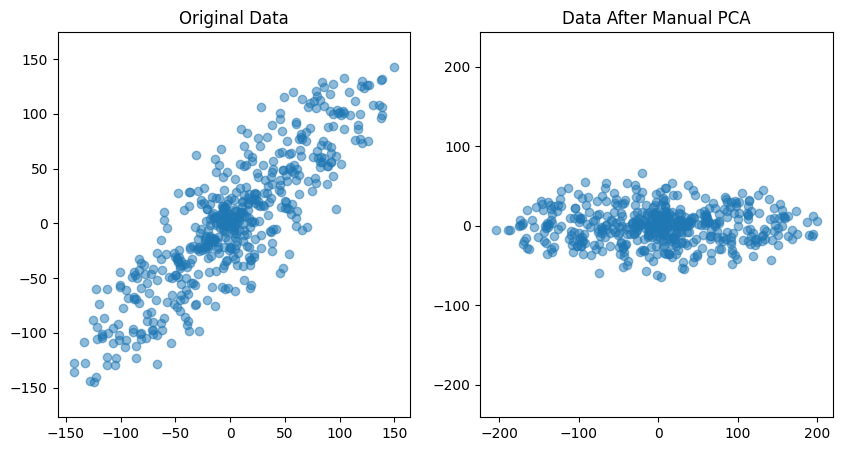

In [ ]:
data = np.vstack((x_rot, y_rot)).T

# Performing manual PCA
transformed_data, pca_vectors, pca_values = manual_pca(data)

# Plotting the results
plt.figure(figsize=(10, 5))

# Original Data
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.title('Original Data')
plt.axis('equal')

# Transformed Data
plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.5)
plt.title('Data After Manual PCA')
plt.axis('equal')

plt.show()

In [ ]:
print("Principal components (eigenvectors):\n", pca_vectors)
print("Eigenvalues (explained variance):\n", pca_values)

Principal components (eigenvectors):
 [[-0.70427357 -0.70992869]
 [-0.70992869  0.70427357]]
Eigenvalues (explained variance):
 [6923.51925657  491.63757652]


In [ ]:
explained_variance_ratio = pca_values/sum(pca_values)
explained_variance_ratio

array([0.93369829, 0.06630171])

In [ ]:
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(data)
print(x_pca.shape)

(500, 2)


In [ ]:
pca.explained_variance_ratio_

array([0.93369829, 0.06630171])

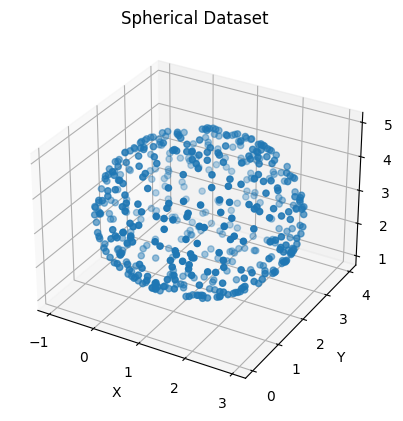

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spherical_data(num_samples, center, radius):
    phi = np.random.uniform(0, 2 * np.pi, num_samples)
    costheta = np.random.uniform(-1, 1, num_samples)
    theta = np.arccos(costheta)

    x = center[0] + radius * np.sin(theta) * np.cos(phi)
    y = center[1] + radius * np.sin(theta) * np.sin(phi)
    z = center[2] + radius * np.cos(theta)

    return np.stack((x, y, z), axis=-1),x,y,z

# Parameters
num_samples = 500
center = (1, 2, 3)  # Center of the sphere
radius = 2

# Generate spherical data
spherical_data,x,y,z = generate_spherical_data(num_samples, center, radius)

# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Spherical Dataset')
plt.show()


In [ ]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(spherical_data)
print(x_pca.shape)

(500, 3)


In [ ]:
pca.explained_variance_

array([1.42537574, 1.33238031, 1.24951371])

In [ ]:
toy_data = np.load('Toy_data.npy') # update path
labels = np.load('Toy_labels.npy') # update path

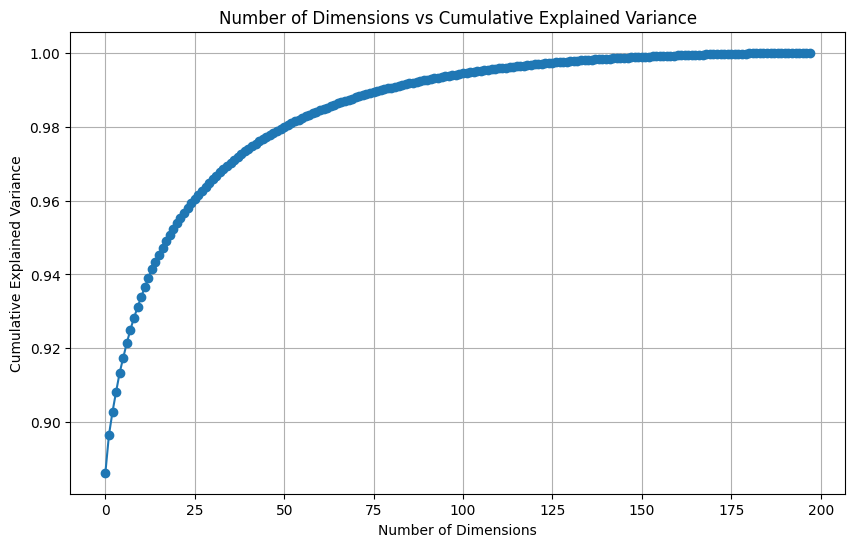

Explained Variance Ratio after reducing dimensions to 2:
[0.88634247 0.01023293]


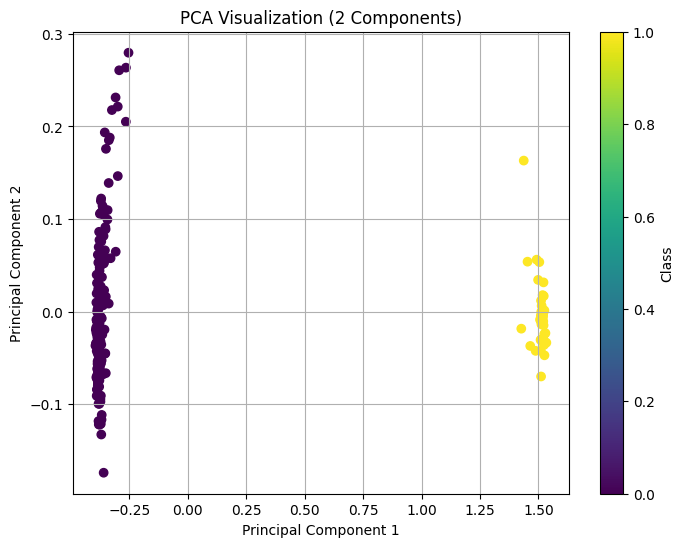

In [ ]:
# Step a: Find the number of most important dimensions
pca = PCA()
pca.fit(toy_data)

# Plot number of dimensions vs cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Dimensions')
plt.ylabel('Cumulative Explained Variance')
plt.title('Number of Dimensions vs Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Step b: Reduce the number of dimensions to 2
pca = PCA(n_components=2)
toy_data_transformed = pca.fit_transform(toy_data)

# Print explained_variance_ratio
print("Explained Variance Ratio after reducing dimensions to 2:")
print(pca.explained_variance_ratio_)

# Step c: Plot the newly transformed data
plt.figure(figsize=(8, 6))
plt.scatter(toy_data_transformed[:, 0], toy_data_transformed[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (2 Components)')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()